In [2]:
import numpy as np
from scipy.linalg import lu 

In [51]:
A1 = np.array([[2,5],[1,2]])
y1 = np.array([[21] , [8]])
A2 = np.array([ [1,1,1] , [4,3,-1] , [3 , 5 , 3]])
y2 = np.array([[1],[6],[4]])

In [52]:
#Check shapes
print("A1 shape ",A1.shape)
print("y1 shape ",y1.shape)
print("A2 shape ",A2.shape)
print("y2 shape ",y2.shape)

A1 shape  (2, 2)
y1 shape  (2, 1)
A2 shape  (3, 3)
y2 shape  (3, 1)


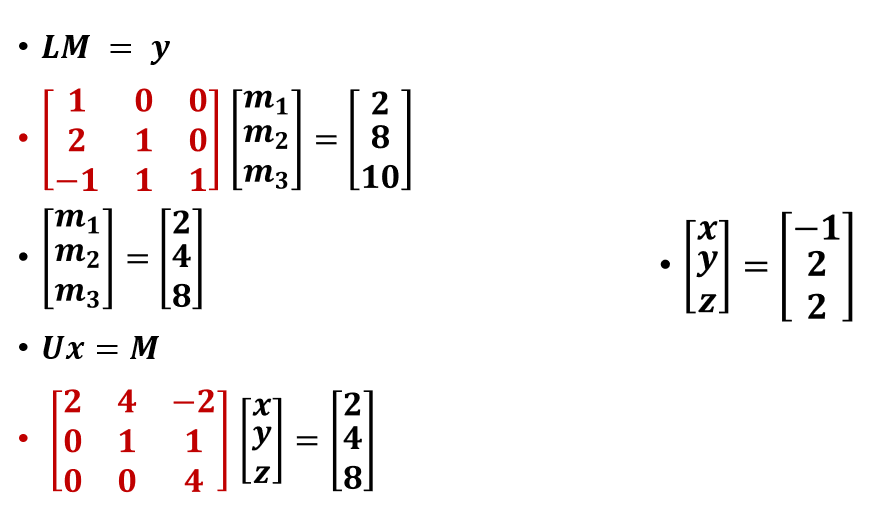

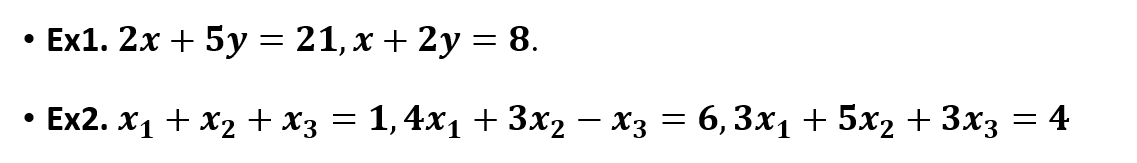

# Problem 1 (2*2)

In [53]:
P1 ,L1 ,U1 = lu(A1)

In [54]:
y1_premuted = np.linalg.inv(P1).dot(y1)
M1 = np.linalg.inv(L1).dot(y1_premuted)
X1 = np.linalg.inv(U1).dot(M1)

In [55]:
print(X1)

[[-2.]
 [ 5.]]


# Problem 1 (3*3)

In [56]:
P2 ,L2 ,U2 = lu(A2)

In [57]:
y2_premuted = np.linalg.inv(P2).dot(y2)
M2 = np.linalg.inv(L2).dot(y2_premuted)
X2 = np.linalg.inv(U2).dot(M2)

In [58]:
print(X2)

[[ 1. ]
 [ 0.5]
 [-0.5]]


# Jacobi not verctoriced

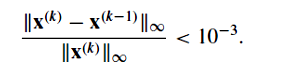

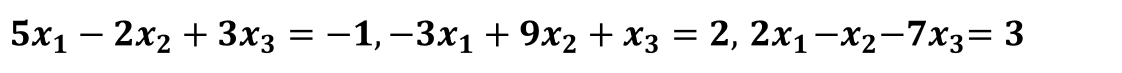

In [74]:
#jacobi


x1 = 0 
x2 = 0 
x3 = 0
max_itera = 10
epsilon = 0.00001

for i in range(max_itera):   
    x1_tmp = (2/5)*x2 - (3/5)*x3 - 1/5 
    x2_tmp = (3/9)* x1 - (1/9)*x3 + 2/9
    x3_tmp = (2/7)*x1 -(1/7)*x2 - 3/7
    
    print("K =" , i+1 , "," ,x1 ,x2 ,x3 )
    
    if (np.linalg.norm(np.array([x1 , x2 ,x3]) - np.array([x1_tmp , x2_tmp ,x3_tmp])) < epsilon):
        print("Converged Succfully ")
        break
    
    x1 = x1_tmp
    x2 = x2_tmp
    x3 = x3_tmp
    
    
        
    

K = 1 , 0 0 0
K = 2 , -0.2 0.2222222222222222 -0.42857142857142855
K = 3 , 0.146031746031746 0.20317460317460317 -0.5174603174603174
K = 4 , 0.19174603174603166 0.32839506172839505 -0.41587301587301584
K = 5 , 0.18088183421516751 0.33234567901234563 -0.42070042831947596
K = 6 , 0.18535852859662383 0.3292606589961087 -0.4243688586545729
K = 7 , 0.18632557879118722 0.3311604938271605 -0.42264908597183726
K = 8 , 0.18605364911396655 0.3312917580383776 -0.42264419089211225
K = 9 , 0.1861032177506184 0.3312005709148902 -0.42274063711577775
K = 10 , 0.18612461063542268 0.3312278100408481 -0.42271344791623616
Converged Succfully 


# Gauss not verctoriced

In [73]:
x1 = 0 
x2 = 0 
x3 = 0
max_itera = 10
epsilon = 0.00001


#gauss
for i in range(max_itera):
    x1_tmp = x1
    x1 = (2/5)*x2 - (3/5)*x3 - 1/5
    x2_tmp = x2
    x2 = (3/9)* x1 - (1/9)*x3 + 2/9
    x3_tmp = x3
    x3 = (2/7)*x1 -(1/7)*x2 - 3/7
    
    print("K =" , i+1 , "," ,x1 ,x2 ,x3 )
    
    if (np.linalg.norm(np.array([x1 , x2 ,x3]) - np.array([x1_tmp , x2_tmp ,x3_tmp])) < epsilon):
        print("Converged Succfully ")
        break

    
    

K = 1 , -0.2 0.15555555555555556 -0.5079365079365079
K = 2 , 0.16698412698412696 0.33432098765432094 -0.42862181909800956
K = 3 , 0.19090148652053412 0.33348069762884575 -0.4216682463696825
K = 4 , 0.18639322687334775 0.3312053252210806 -0.42263126735348355
K = 5 , 0.18606089050052232 0.3312015487616723 -0.42272568110866104
K = 6 , 0.18611602816986555 0.3312304184020286 -0.4227140517231853
K = 7 , 0.18612059839472267 0.3312306496563726 -0.4227127789809896
Converged Succfully 


# Jacobi verctoriced

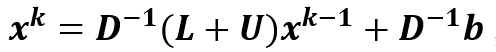

In [131]:
A = np.array([[5, -2, 3],
             [-3, 9, 1],
             [2, -1, -7]])
X_prevois = np.array([[0] , [0 ], [0]])
b = np.array([[-1] ,[2 ],[3]])
max_itera = 1000
epsilon = 0.00001

D_vecor = A.diagonal()
D_matrix = np.diag(np.diag(A))
U = -np.triu(A , 1)
L = -np.tril(A , -1)




In [132]:
T = np.linalg.inv(D_matrix).dot(L+U)
C = np.linalg.inv(D_matrix).dot(b)
for i in range (max_itera):
    X_k = T.dot(X_prevois) + C
    
    if (np.linalg.norm(X_k - X_prevois)/np.linalg.norm(X_k) < epsilon):
        print("Converged Succfully ")
        break
        
    X_prevois = X_k    

Converged Succfully 


In [133]:
print("D Vector : " , D_vecor)
print("D Matrix : \n" , D_matrix)
print("U Matrix : \n" , U)
print("L Matrix : \n" , L)

D Vector :  [ 5  9 -7]
D Matrix : 
 [[ 5  0  0]
 [ 0  9  0]
 [ 0  0 -7]]
U Matrix : 
 [[ 0  2 -3]
 [ 0  0 -1]
 [ 0  0  0]]
L Matrix : 
 [[ 0  0  0]
 [ 3  0  0]
 [-2  1  0]]


In [134]:
print("My solution \n",X_k)

My solution 
 [[ 0.1861195 ]
 [ 0.33122987]
 [-0.42271336]]


In [135]:
print("Libarary solution \n",np.linalg.solve(A , b))

Libarary solution 
 [[ 0.18611987]
 [ 0.33123028]
 [-0.42271293]]


# Gauss verctoriced

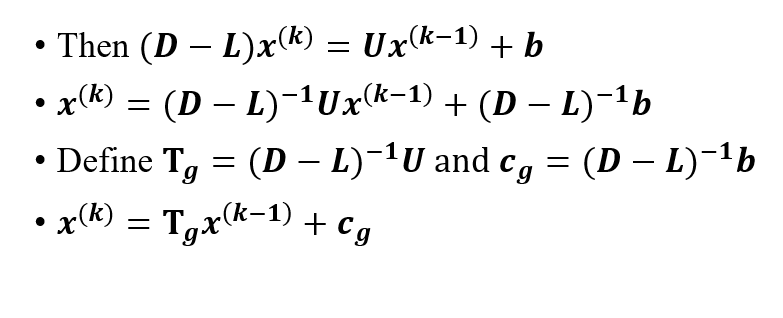

In [3]:
A = np.array([[5, -2, 3],
             [-3, 9, 1],
             [2, -1, -7]])
X_prevois = np.array([[0] , [0 ], [0]])
b = np.array([[-1] ,[2 ],[3]])
max_itera = 1000
epsilon = 0.00001

D_vecor = A.diagonal()
D_matrix = np.diag(np.diag(A))
U = -np.triu(A , 1)
L = -np.tril(A , -1)

In [4]:
Tg = np.linalg.inv(D_matrix-L).dot(U)
Cg = np.linalg.inv(D_matrix-L).dot(b)
for i in range (max_itera):
    X_k = Tg.dot(X_prevois) + Cg
    
    if (np.linalg.norm(X_k - X_prevois)/np.linalg.norm(X_k) < epsilon):
        print("Converged Succfully ")
        break
        
    X_prevois = X_k   

Converged Succfully 


In [5]:
print("D Vector : " , D_vecor)
print("D Matrix : \n" , D_matrix)
print("U Matrix : \n" , U)
print("L Matrix : \n" , L)

D Vector :  [ 5  9 -7]
D Matrix : 
 [[ 5  0  0]
 [ 0  9  0]
 [ 0  0 -7]]
U Matrix : 
 [[ 0  2 -3]
 [ 0  0 -1]
 [ 0  0  0]]
L Matrix : 
 [[ 0  0  0]
 [ 3  0  0]
 [-2  1  0]]


In [6]:
print("My solution \n",X_k)

My solution 
 [[ 0.1861206 ]
 [ 0.33123065]
 [-0.42271278]]


In [7]:
print("Libarary solution \n",np.linalg.solve(A , b))

Libarary solution 
 [[ 0.18611987]
 [ 0.33123028]
 [-0.42271293]]
